# orthogonal distance regression

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

## data retrieval

had to run the script in matlab and then save it as a `.mat` file lol

In [2]:
data = scipy.io.loadmat("data/orthregdata.mat")

a: np.ndarray = data["a"].reshape(-1)
b: np.ndarray = data["b"].reshape(-1)

## actual regression

In [3]:
def quad_formula(a: float, b: float, c: float):
    discr = np.sqrt(b ** 2 - 4 * a * c)
    denom = 2 * a
    return (-b + discr) / denom, (-b - discr) / denom

In [4]:
rho = np.corrcoef(a, b)[0, 1]
sa, sb = a.std(), b.std()

c2_cand = quad_formula(rho, sa / sb - sb / sa, -rho)
c2 = min(c2_cand) if rho < 0 else max(c2_cand)  # choose the one w/ the same sign

c1 = b.mean() - c2 * a.mean()
lstsq_sol = np.polyfit(a, b, deg=1)

## plotting the result

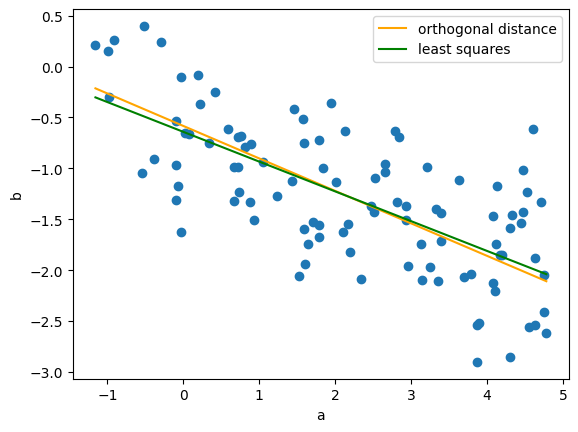

In [5]:
x = np.linspace(a.min(), a.max(), 1000)
ortho_y = c1 + c2 * x
lstsq_y = lstsq_sol[1] + lstsq_sol[0] * x

plt.scatter(a, b)
plt.plot(x, ortho_y, color="orange", label="orthogonal distance")
plt.plot(x, lstsq_y, color="green", label="least squares")
plt.xlabel("a")
plt.ylabel("b")
plt.legend()